In [2]:
!pip install chart_studio

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly import tools
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from xgboost import XGBClassifier
from sklearn import svm

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import  f1_score
import os
from sklearn.ensemble import RandomForestClassifier
print(os.listdir())

['.config', 'mushrooms.csv', 'sample_data']


In [5]:
data=pd.read_csv('mushrooms.csv')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [7]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [8]:
X=data.drop('class',axis=1) #Predictors
y=data['class'] #Response
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [9]:
data.isnull().sum().sum()

0

In [10]:
from sklearn.preprocessing import LabelEncoder
Encoder_X = LabelEncoder()
for col in X.columns:
    X[col] = Encoder_X.fit_transform(X[col])
Encoder_y=LabelEncoder()
y = Encoder_y.fit_transform(y)

In [11]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [12]:
X=pd.get_dummies(X,columns=X.columns,drop_first=True)
X.head()

,cap-shape_1,cap-shape_2,cap-shape_3,cap-shape_4,cap-shape_5,cap-surface_1,cap-surface_2,cap-surface_3,cap-color_1,cap-color_2,...,population_2,population_3,population_4,population_5,habitat_1,habitat_2,habitat_3,habitat_4,habitat_5,habitat_6
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
X_train.shape , X_test.shape

((5686, 95), (2438, 95))

In [15]:
y_train.shape , y_test.shape

((5686,), (2438,))

In [16]:
values={"b":"bell","c":"conical","x":"convex","f":"flat","k":"knobbed","s":"sunken"}
data["cap-shape"]=data["cap-shape"].replace(values)
values2={"f": "fibrous", "g": "grooves","y":"scaly","s": "smooth"}
data["cap-surface"]=data["cap-surface"].replace(values2)
values3={"n":"brown","b":"buff","c":"cinnamon","g":"gray","r":"green","p":"pink","u":"purple","e":"red","w":"white","y":"yellow"}
data["cap-color"]=data["cap-color"].replace(values3)
values4={"a":"almond","l":"anise","c":"creosote","y":"fishy","f":"foul","m":"musty","n":"none","p":"pungent","s":"spicy"}
data["odor"]=data["odor"].replace(values4)
values5={"a":"attached","f":"free"}
data["gill-attachment"]=data["gill-attachment"].replace(values5)
values6={"c":"close","w":"crowded"}
data["gill-spacing"]=data["gill-spacing"].replace(values6)
values7={"b":"broad","n":"narrow"}
data["gill-size"]=data["gill-size"].replace(values7)
values8={"k":"black","b":"buff","n":"brown","h":"chocolate","g":"gray","r":"green","o":"orange","p":"pink","u":"purple","e":"red","w":"white","y":"yellow"}
data["gill-color"]=data["gill-color"].replace(values8)
values9={"t":"tapering","e":"enlarging"}
data["stalk-shape"]=data["stalk-shape"].replace(values9)
values10={"b":"bulbous","c":"club","e":"equal","z":"rhizomorphs","r":"rooted","?":"missing"}
data["stalk-root"]=data["stalk-root"].replace(values10)
values11={"s":"smooth","k":"silky","f":"fibrous","y":"scaly"}
data["stalk-surface-above-ring"]=data["stalk-surface-above-ring"].replace(values11)
data["stalk-surface-below-ring"]=data["stalk-surface-below-ring"].replace(values11)
values12={"n":"brown","b":"buff","c":"cinnamon","g":"gray","p":"pink","e":"red","w":"white","y":"yellow","o":"orange"}
data["stalk-color-above-ring"]=data["stalk-color-above-ring"].replace(values12)
data["stalk-color-below-ring"]=data["stalk-color-below-ring"].replace(values12)
veil_type={"p":"partial","u":"universal"}
data["veil-type"]=data["veil-type"].replace(veil_type)
veil_color={"n":"brown","o":"orange","w":"white","y":"yellow"}
data["veil-color"]=data["veil-color"].replace(veil_color)
ring_number= {"n":"none","o":"one","t":"two"}
data["ring-number"]=data["ring-number"].replace(ring_number)
ring_type={"c":"cobwebby","e":"evanescent","f":"flaring","l":"large","n":"none","p":"pendant","s":"sheathing","z":"zone"}
data["ring-type"]=data["ring-type"].replace(ring_type)
spore_print_color= {"k":"black","n":"brown","b":"buff","h":"chocolate","r":"green","o":"orange","u":"purple","w":"white","y":"yellow"}
data["spore-print-color"]=data["spore-print-color"].replace(spore_print_color)
population={"a":"abundant","c":"clustered","n":"numerous","s":"scattered","v":"several","y":"solitary"}
data["population"]=data["population"].replace(population)
habitat={"g":"grasses","l":"leaves","m":"meadows","p":"paths","u":"urban","w":"waste","d":"woods"}
data["habitat"]=data["habitat"].replace(habitat)
bruises={"t":"bruises","f":"no"}
data["bruises"]=data["bruises"].replace(bruises)

In [17]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,e,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,e,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,p,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,e,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


In [18]:
edible=data[data["class"]=="e"]
poisonous=data[data["class"]=="p"]

In [19]:
class_dim = go.parcats.Dimension(
    values=data["class"].values,
    label="Mushroom Types",
    categoryarray=["e", "p"],
    ticktext=['edible', 'poisonous']
)

cap_shape_dim = go.parcats.Dimension(
    values=data["cap-shape"].values,
    label="Cap Shape"
)

cap_surface_dim = go.parcats.Dimension(
  values=data["cap-surface"].values,
  label="Cap Surface"
)
cap_color_dim = go.parcats.Dimension(
  values=data["cap-color"].values,
  label="Cap Color"
)
color = [1 if i=="e" else 0 for i in data["class"]]
colorscale = [[0, 'lightcoral'], [1, 'mediumseagreen']];
data1 = [
    go.Parcats(
        dimensions=[class_dim,cap_surface_dim,cap_shape_dim,cap_color_dim],
        line={'color': color,
              'colorscale': colorscale},
        hoveron='dimension',
        hoverinfo='count+probability',
        labelfont={'size': 18, 'family': 'Times'},
        tickfont={'size': 16, 'family': 'Times'},
        arrangement='fixed',
    )

]


iplot(data1)

In [20]:
data4=[

    go.Histogram(
        histfunc="count",
        x=edible["bruises"],
        name="edible",
        marker=dict(color="lightgreen",line=dict(color="darkgreen",width=5))

    ),

    go.Histogram(
    histfunc = "count",
    x = poisonous["bruises"],
    name = "poisonous",
    marker=dict(color="mistyrose",line=dict(color='maroon', width=5)),
    opacity=0.75
  )
]

layout = go.Layout(
    title='Bruises Counts with Mushroom Type',
    xaxis=dict(
        title=''
    ),
    yaxis=dict(
        title='Count'
    ),
    bargap=0.2,
    bargroupgap=0.1, paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor="rgb(243, 243, 243)")
fig = go.Figure(data=data4, layout=layout)
iplot(fig)

In [21]:
import plotly.figure_factory as ff

z=[[0, 3680, 528], [36, 3808, 72]]

x=['None', 'One', 'Two']
y = ['Edible', 'Poisonous']

z_text = [["0", '3680', '528'],
          ['36', '3808', '72']]

fig = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text, colorscale='Blackbody')
iplot(fig)

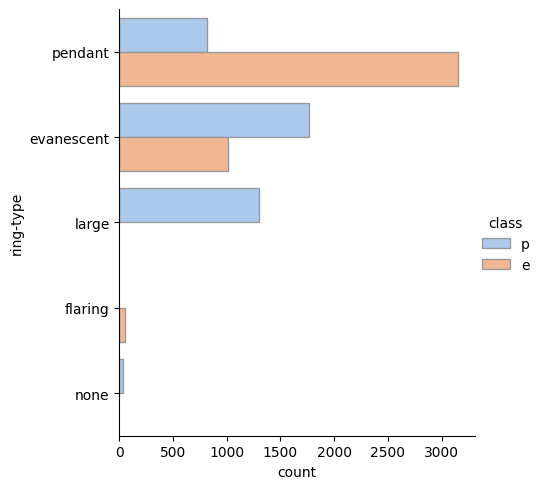

In [22]:
sns.catplot(y="ring-type", hue="class", kind="count",height=5,
            palette="pastel", edgecolor=".6",
            data=data)

In [23]:
fig = {
  "data": [
    {
      "values": [1744,1648,576,48,48,48,48,48],
      "labels": ['Brown','Black','White','Orange',"Purple","Chocolate","Yellow","Buff"],
      "domain": {"column": 0},
      "name": "Edible Mushrooms",
      "hoverinfo":"label+percent+name",
      "type": "pie",
         "hole": .4,
        'marker': {'colors': ['brown', 'black', 'white', 'orange',"purple","sienna","yellow","peru"],
                  "line":{"color":'#000000',"width":2}}
    },
    {
      "values": [1812,1584,224,224,72],
      "labels": ["White","Chocolate","Brown","Black","Green"],
      "domain": {"column": 1},
      "name": "Poisonous Mushrooms",
      "hoverinfo":"label+percent+name",
         "hole": .4,
      "type": "pie",
        "marker": {"colors":["white","sienna","brown","black","green"],
                  "line":{"color":'#000000',"width":2}}
}],
  "layout": {

        "title":"Edible and Poisonous Mushrooms Spore Print Color Percentages",
        "grid": {"rows": 1, "columns": 2},
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Edible",
                "x": 0.20,
                "y": 1.05
            },
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Poisonous",
                "x": 0.85,
                "y": 1.05
            }
        ]
    }
}
iplot(fig)


In [24]:
class_dim = go.parcats.Dimension(
    values=data["class"].values,
    label="Mushroom Types",
    categoryarray=["e", "p"],
    ticktext=['edible', 'poisonous']
)

population_dim = go.parcats.Dimension(
    values=data["population"].values,
    label="Population"
)

habitat_dim = go.parcats.Dimension(
  values=data["habitat"].values,
  label="Habitat"
)
color = [1 if i=="e" else 0 for i in data["class"]]
colorscale = [[0, 'coral'], [1, 'gray']];
data19 = [
    go.Parcats(
        dimensions=[class_dim,population_dim,habitat_dim],
        line={'color': color,"showscale":True,
              'colorscale': colorscale},
        hoveron='dimension',
        hoverinfo='count+probability',
        labelfont={'size': 18, 'family': 'Arial'},
        tickfont={'size': 16, 'family': 'Arial'},
        arrangement='freeform',
    )

]


iplot(data19)

In [25]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

[Text(0.5769230769230769, 0.875, 'x[22] <= 0.5\ngini = 0.499\nsamples = 5686\nvalue = [2951, 2735]'),
 Text(0.3076923076923077, 0.625, 'x[42] <= 0.5\ngini = 0.28\nsamples = 3191\nvalue = [537, 2654]'),
 Text(0.15384615384615385, 0.375, 'x[50] <= 0.5\ngini = 0.122\nsamples = 2809\nvalue = [184, 2625]'),
 Text(0.07692307692307693, 0.125, 'gini = 0.044\nsamples = 2685\nvalue = [60, 2625]'),
 Text(0.23076923076923078, 0.125, 'gini = 0.0\nsamples = 124\nvalue = [124, 0]'),
 Text(0.46153846153846156, 0.375, 'x[82] <= 0.5\ngini = 0.14\nsamples = 382\nvalue = [353, 29]'),
 Text(0.38461538461538464, 0.125, 'gini = 0.0\nsamples = 353\nvalue = [353, 0]'),
 Text(0.5384615384615384, 0.125, 'gini = 0.0\nsamples = 29\nvalue = [0, 29]'),
 Text(0.8461538461538461, 0.625, 'x[80] <= 0.5\ngini = 0.063\nsamples = 2495\nvalue = [2414, 81]'),
 Text(0.7692307692307693, 0.375, 'x[50] <= 0.5\ngini = 0.026\nsamples = 2446\nvalue = [2414, 32]'),
 Text(0.6923076923076923, 0.125, 'gini = 0.004\nsamples = 2408\nvalu

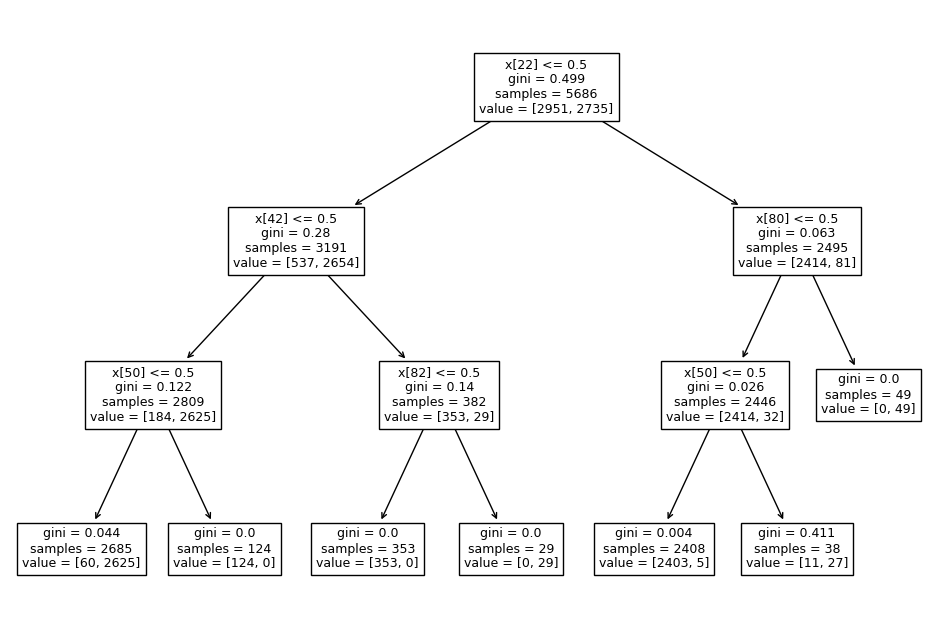

In [26]:
plt.figure(figsize=(12,8))

tree.plot_tree(clf_gini.fit(X_train, y_train))

In [27]:
y_pred_gini=clf_gini.predict(X_test)

In [28]:
y_pred_train_gini=clf_gini.predict(X_train)

y_pred_train_gini

array([1, 0, 1, ..., 0, 1, 0])

In [29]:
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Model accuracy score with criterion gini index: 0.9820
Training-set accuracy score: 0.9866


In [30]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

[Text(0.5, 0.875, 'x[22] <= 0.5\nentropy = 0.999\nsamples = 5686\nvalue = [2951, 2735]'),
 Text(0.2, 0.625, 'x[17] <= 0.5\nentropy = 0.654\nsamples = 3191\nvalue = [537, 2654]'),
 Text(0.1, 0.375, 'entropy = 0.0\nsamples = 2284\nvalue = [0, 2284]'),
 Text(0.3, 0.375, 'x[42] <= 0.5\nentropy = 0.975\nsamples = 907\nvalue = [537, 370]'),
 Text(0.2, 0.125, 'entropy = 0.917\nsamples = 554\nvalue = [184, 370]'),
 Text(0.4, 0.125, 'entropy = 0.0\nsamples = 353\nvalue = [353, 0]'),
 Text(0.8, 0.625, 'x[80] <= 0.5\nentropy = 0.207\nsamples = 2495\nvalue = [2414, 81]'),
 Text(0.7, 0.375, 'x[50] <= 0.5\nentropy = 0.101\nsamples = 2446\nvalue = [2414, 32]'),
 Text(0.6, 0.125, 'entropy = 0.021\nsamples = 2408\nvalue = [2403, 5]'),
 Text(0.8, 0.125, 'entropy = 0.868\nsamples = 38\nvalue = [11, 27]'),
 Text(0.9, 0.375, 'entropy = 0.0\nsamples = 49\nvalue = [0, 49]')]

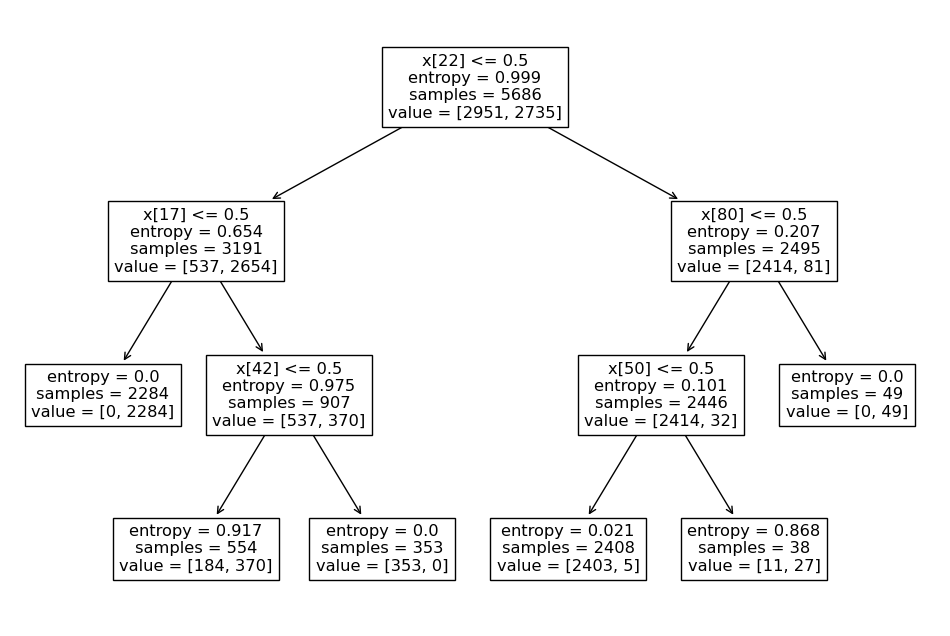

In [31]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf_en.fit(X_train, y_train))

In [32]:
y_pred_en = clf_en.predict(X_test)

In [33]:
y_pred_train_en = clf_en.predict(X_train)

In [34]:
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Model accuracy score with criterion entropy: 0.9541
Training-set accuracy score: 0.9648


In [35]:
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.9648
Test set score: 0.9541


In [36]:
cm=confusion_matrix(y_test,y_pred_en)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[1148  109]
 [   3 1178]]


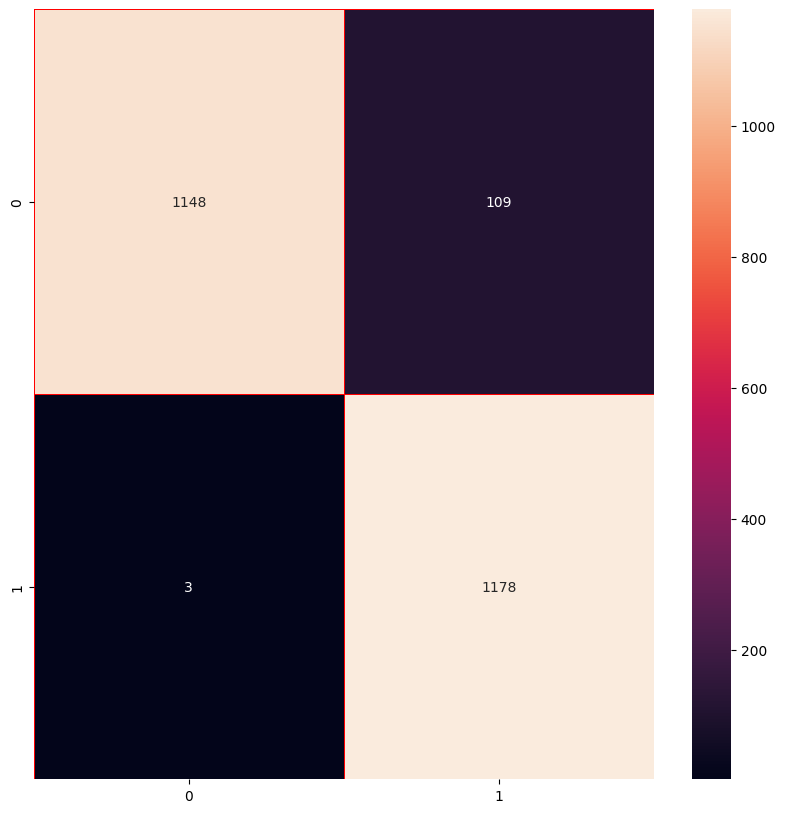

<Figure size 640x480 with 0 Axes>

In [37]:
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(cm, annot=True, linewidths=0.5,linecolor="red", fmt= '.0f',ax=ax)
plt.show()
plt.savefig('ConfusionMatrix.png')

In [38]:
print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95      1257
           1       0.92      1.00      0.95      1181

    accuracy                           0.95      2438
   macro avg       0.96      0.96      0.95      2438
weighted avg       0.96      0.95      0.95      2438



In [39]:
f1_score = f1_score(y_test, y_pred_en)
print("F1 Score:",f1_score)

F1 Score: 0.9546191247974068


In [40]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test, y_pred_en))


              precision    recall  f1-score   support

           0       1.00      0.91      0.95      1257
           1       0.92      1.00      0.95      1181

    accuracy                           0.95      2438
   macro avg       0.96      0.96      0.95      2438
weighted avg       0.96      0.95      0.95      2438



In [41]:
model_1 = RandomForestClassifier(max_depth=10,random_state=10)

model_1.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, random_state=10)

In [42]:
y_pred = model_1.predict(X_test)

In [43]:
accuracy_score(y_test,y_pred)

1.0